# Astrophysics Environment Test: The Hubble Constant

This notebook verifies your Python environment by performing a classic cosmological analysis: estimating the Hubble Constant ($H_0$) using synthetic Type Ia Supernova data.

Libraries tested:
- **Astropy**: Cosmology calculations (`astropy.cosmology`) and units.
- **NumPy**: Data generation and array manipulation.
- **SciPy**: Curve fitting (`scipy.optimize`).
- **Seaborn/Matplotlib**: Visualization.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.cosmology import Planck18
from astropy import units as u
from scipy.optimize import curve_fit

# Set plot style
sns.set_theme(style="darkgrid", context="talk")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully.")

Libraries imported successfully.


## 1. Generate Synthetic Data

We will simulate Type Ia Supernovae observations. 
We generate a range of redshifts ($z$) and calculate the theoretical Distance Modulus ($\mu$) using a standard cosmology (Planck18). We then add Gaussian noise to simulate observational error.

In [8]:
# 1. Generate Redshifts (z)
np.random.seed(42)
n_supernovae = 50
z_obs = np.random.uniform(0.01, 1.0, n_supernovae)
z_obs = np.sort(z_obs)

# 2. Calculate Theoretical Distance Modulus (mu)
# Distance Modulus mu = 5 * log10(DL_Mpc) + 25
mu_theoretical = Planck18.distmod(z_obs).value

# 3. Add observational noise
magnitude_error = 0.2
mu_obs = mu_theoretical + np.random.normal(0, magnitude_error, n_supernovae)

print(f"Generated {n_supernovae} synthetic SN Ia observations.")

Generated 50 synthetic SN Ia observations.


## 2. The Hubble Diagram

We plot the Distance Modulus against redshift ($log_{10}(z)$ usually for linearity at low z, but here we plot linear $z$ for the standard curve).

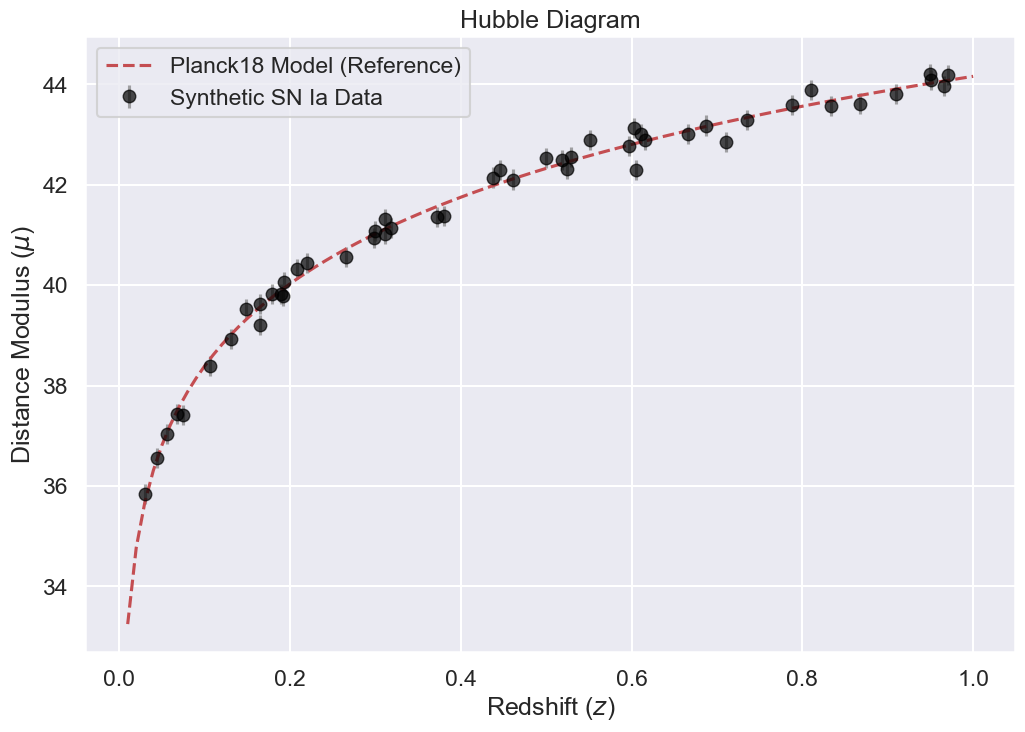

In [9]:
plt.figure()
plt.errorbar(z_obs, mu_obs, yerr=magnitude_error, fmt='o', color='black', 
             ecolor='gray', alpha=0.7, label='Synthetic SN Ia Data')

# Plot the theoretical curve for comparison
z_smooth = np.linspace(0.01, 1.0, 100)
plt.plot(z_smooth, Planck18.distmod(z_smooth).value, 'r--', label='Planck18 Model (Reference)')

plt.xlabel("Redshift ($z$)")
plt.ylabel("Distance Modulus ($\mu$)")
plt.title("Hubble Diagram")
plt.legend()
plt.show()

## 3. Estimate Hubble Constant ($H_0$)

For low redshifts ($z \ll 1$), the luminosity distance is approximated by Hubble's Law:
$$ d_L \approx \frac{c z}{H_0} $$

The distance modulus is:
$$ \mu = 5 \log_{10}(d_L) + 25 = 5 \log_{10}\left(\frac{c z}{H_0}\right) + 25 $$

We can fit this to our low-$z$ data to estimate $H_0$.

In [10]:
# Filter for low redshift (z < 0.1) where the linear approximation holds best
low_z_mask = z_obs < 0.1
z_low = z_obs[low_z_mask]
mu_low = mu_obs[low_z_mask]

def distance_modulus_model(z, H0):
    c = 2.998e5 # speed of light in km/s
    dL = (c * z) / H0 # in Mpc
    mu = 5 * np.log10(dL) + 25
    return mu

# Perform Curve Fit
popt, pcov = curve_fit(distance_modulus_model, z_low, mu_low, p0=[70.0])
H0_fit = popt[0]
H0_err = np.sqrt(np.diag(pcov))[0]

print(f"Estimated Hubble Constant: H0 = {H0_fit:.2f} +/- {H0_err:.2f} km/s/Mpc")
print(f"Planck18 Reference Value: {Planck18.H0.value:.2f} km/s/Mpc")

Estimated Hubble Constant: H0 = 66.20 +/- 1.89 km/s/Mpc
Planck18 Reference Value: 67.66 km/s/Mpc
